In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
import functools as ft
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [161]:
df1 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XTPI0009[2022-05-23-10-18-57].csv',encoding='utf-16',delimiter='\t')
df2 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XALS0002.csv',encoding='utf-16',delimiter='\t')
df3 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XS300003.csv',encoding='utf-16',delimiter='\t')
df4 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XSLC0000.csv',encoding='utf-16',delimiter='\t')
df5 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XSNT0009.csv',encoding='utf-16',delimiter='\t')
df6 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XTAL0001.csv',encoding='utf-16',delimiter='\t')
df7 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XAFF0005.csv',encoding='utf-16',delimiter='\t')
df8 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XTPI0025.csv',encoding='utf-16',delimiter='\t')
df9 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRX6XWAI0001.csv',encoding='utf-16',delimiter='\t')
df10 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXYXTPI0009.csv',encoding='utf-16',delimiter='\t')
df11 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXYXTPI0025.csv',encoding='utf-16',delimiter='\t')
df12 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXZXCMI0000.csv',encoding='utf-16',delimiter='\t')
df13 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXZXENG0009.csv',encoding='utf-16',delimiter='\t')
df14 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXZXOCI0008.csv',encoding='utf-16',delimiter='\t')
df15 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXZXTRI0006.csv',encoding='utf-16',delimiter='\t')
df16 = pd.read_csv('D:/AmirKabir/neural network/6/New folder/IRXZXWDI0007.csv',encoding='utf-16',delimiter='\t')                  

In [ ]:
dfs = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='<DTYYYYMMDD>'), dfs)

In [ ]:
dataset = df_final .loc[(df_final['<DTYYYYMMDD>'] >= 20210501)]
dataset.reset_index(inplace=True)
dataset.drop(['index'], axis=1,inplace=True)

In [164]:
dataset

,<DTYYYYMMDD>,<OPEN>_x,<HIGH>_x,<LOW>_x,org_close,<VOL>_x,<OPENINT>_x,<OPENINT>.1_x,<OPENINT>.2_x,<LAST>_x,...,<LAST>_x,<OPEN>_y,<HIGH>_y,<LOW>_y,<CLOSE>,<VOL>_y,<OPENINT>_y,<OPENINT>.1_y,<OPENINT>.2_y,<LAST>_y
0,20210501,1208560.0,1208560.0,1194303.5,1194303.5,3701769749,1.630000e+13,215895,4.778443e+10,1194303.5,...,159.0,214.3,214.3,214.3,214.3,1044,5.460016e+07,8,10782875.76,214.3
1,20210502,1191400.0,1191400.0,1180709.1,1180709.1,2041457656,1.060000e+13,134221,4.724093e+10,1180709.1,...,158.8,214.3,214.3,214.3,214.3,945,4.942066e+07,6,10782546.14,214.3
2,20210503,1176770.0,1176770.0,1167072.7,1167072.7,1589299529,9.140000e+12,144518,4.669533e+10,1167072.7,...,158.8,214.3,214.3,214.3,214.3,1027,5.370696e+07,6,10782041.86,214.3
3,20210505,1167870.0,1172610.0,1172249.3,1172249.3,3573775657,1.890000e+13,260411,4.689892e+10,1172249.3,...,158.1,214.3,214.3,214.3,214.3,1575,8.236148e+07,12,10781492.54,214.3
4,20210508,1176190.0,1176190.0,1167498.3,1167498.3,1895501673,1.250000e+13,187024,4.670543e+10,1167498.3,...,157.4,214.3,214.3,214.3,214.3,1253,6.551937e+07,5,10781055.53,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,20220409,1460550.0,1460550.0,1458684.4,1458684.4,8423628503,3.770000e+13,462958,5.810100e+10,1458684.4,...,132.2,122.2,123.0,123.0,123.0,956352,2.812269e+10,2052,5881242.92,123.0
224,20220410,1461710.0,1474240.0,1474099.6,1474099.6,11270947735,4.370000e+13,483996,5.871501e+10,1474099.6,...,130.6,125.3,125.3,124.4,124.4,862594,2.564354e+10,1912,5945681.07,124.4
225,20220411,1475490.0,1479890.0,1479590.9,1479590.9,10070884564,3.960000e+13,504631,5.893313e+10,1479590.9,...,127.5,123.0,128.2,128.2,128.2,1369038,4.194660e+10,2805,6127894.30,128.2
226,20220412,1474000.0,1474000.0,1445970.5,1445970.5,9289109331,4.010000e+13,430607,5.759041e+10,1445970.5,...,126.8,127.6,127.6,123.0,123.0,1044661,3.070443e+10,1336,5878353.43,123.0


In [165]:
label_list =[]
for i in range(len(dataset.org_close)-1) :
    m = dataset.org_close[i+1] - dataset.org_close[i]
    if m < 0:
        m = 0
        label_list.append(m)
    else:
        m = 1
        label_list.append(m)
label_list.append(1)

In [166]:
min_max_scaler = MinMaxScaler()
dataset = min_max_scaler.fit_transform(dataset)

In [167]:
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0.000000,0.231993,0.215077,0.205353,0.205353,0.164191,0.071700,0.060317,0.206235,0.205353,...,0.498047,1.000000,1.000000,1.000000,1.000000,0.000117,0.000162,0.000139,1.000000,1.000000
1,0.000101,0.196688,0.179362,0.177034,0.177034,0.035144,0.014620,0.000000,0.178154,0.177034,...,0.496094,1.000000,1.000000,1.000000,1.000000,0.000106,0.000147,0.000104,0.999945,1.000000
2,0.000202,0.166588,0.148914,0.148627,0.148627,0.000000,0.000000,0.007604,0.149965,0.148627,...,0.496094,1.000000,1.000000,1.000000,1.000000,0.000115,0.000159,0.000104,0.999861,1.000000
3,0.000404,0.148277,0.140256,0.159411,0.159411,0.154242,0.097737,0.093192,0.160484,0.159411,...,0.489258,1.000000,1.000000,1.000000,1.000000,0.000176,0.000244,0.000209,0.999769,1.000000
4,0.000706,0.165395,0.147706,0.149514,0.149514,0.023799,0.033647,0.038995,0.150487,0.149514,...,0.482422,1.000000,1.000000,1.000000,1.000000,0.000140,0.000194,0.000087,0.999696,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.999596,0.750437,0.739531,0.756104,0.756104,0.531194,0.286000,0.242775,0.739259,0.756104,...,0.236328,0.570229,0.193463,0.198420,0.198420,0.106838,0.083450,0.035730,0.180485,0.198420
224,0.999697,0.752824,0.768024,0.788217,0.788217,0.752501,0.346085,0.258312,0.770983,0.788217,...,0.220703,0.584694,0.213781,0.210711,0.210711,0.096364,0.076094,0.033293,0.191259,0.210711
225,0.999798,0.781175,0.779783,0.799656,0.799656,0.659227,0.305027,0.273551,0.782252,0.799656,...,0.190430,0.573962,0.239399,0.244074,0.244074,0.152941,0.124471,0.048842,0.221723,0.244074
226,0.999899,0.778109,0.767524,0.729619,0.729619,0.598464,0.310034,0.218884,0.712878,0.729619,...,0.183594,0.595427,0.234099,0.198420,0.198420,0.116704,0.091111,0.023263,0.180002,0.198420


In [168]:
def make_window_dataset(X, Y, batch=None):
    x = []
    y = []
    for i in range(batch, len(X)):
        x.append(X[i - batch : i])
        y.append(Y[i])
    return np.array(x), np.array(y)

In [169]:
x,y = make_window_dataset(dataset,label_list,batch=4)

In [170]:
x.shape,y.shape

((224, 4, 145), (224,))

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.125, random_state=42)

In [172]:
xtrain.shape , ytrain.shape, xtest.shape, ytest.shape

((156, 4, 145), (156,), (45, 4, 145), (45,))

LSTM model

In [155]:
keras.backend.clear_session()
model = Sequential()
model.add(layers.LSTM(128, input_shape=(4,145),kernel_regularizer=keras.regularizers.l1(l1=0.001)))
model.add(layers.Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               140288    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 140,417
Trainable params: 140,417
Non-trainable params: 0
_________________________________________________________________


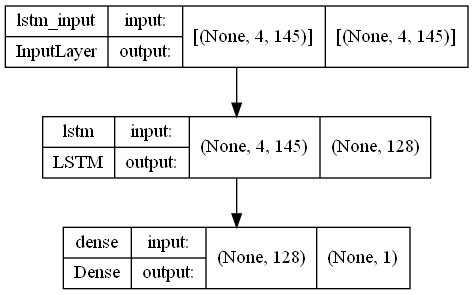

In [156]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [157]:
model.fit(xtrain ,ytrain,validation_data=(xval,yval) , epochs=200)
model.evaluate(xtest,ytest)

Epoch 1/200
5/5 [==============================] - 5s 259ms/step - loss: 4.1315 - accuracy: 0.5449 - val_loss: 3.9102 - val_accuracy: 0.6522
Epoch 2/200
5/5 [==============================] - 0s 28ms/step - loss: 3.8192 - accuracy: 0.5641 - val_loss: 3.6402 - val_accuracy: 0.5217
Epoch 3/200
5/5 [==============================] - 0s 27ms/step - loss: 3.5328 - accuracy: 0.5897 - val_loss: 3.3393 - val_accuracy: 0.6522
Epoch 4/200
5/5 [==============================] - 0s 27ms/step - loss: 3.2566 - accuracy: 0.5769 - val_loss: 3.0780 - val_accuracy: 0.7391
Epoch 5/200
5/5 [==============================] - 0s 27ms/step - loss: 3.0079 - accuracy: 0.6090 - val_loss: 2.8435 - val_accuracy: 0.5652
Epoch 6/200
5/5 [==============================] - 0s 28ms/step - loss: 2.7655 - accuracy: 0.5833 - val_loss: 2.5930 - val_accuracy: 0.6522
Epoch 7/200
5/5 [==============================] - 0s 28ms/step - loss: 2.5359 - accuracy: 0.5833 - val_loss: 2.3906 - val_accuracy: 0.6522
Epoch 8/200
5/5 [==

[0.8393257260322571, 0.5333333611488342]

confusion matrix for LSTM

In [158]:
predictions = model.predict(xtest)
predict = []
for i in predictions:
    if i < 0.5 :
        m = 0
        predict.append(m)
    else:
        m = 1
        predict.append(m)

In [ ]:
tn1, fp1, fn1, tp1 = confusion_matrix(ytest, predict).ravel()
tn1, fp1, fn1, tp1

GRU mdoel

In [140]:
keras.backend.clear_session()
gru_model = Sequential()
gru_model.add(layers.GRU(32, input_shape=(4,145),kernel_regularizer=keras.regularizers.l1(l1=0.001)))
gru_model.add(layers.Dense(units=1,activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [141]:
gru_model.fit(xtrain ,ytrain,validation_data=(xval,yval) , epochs=200)
gru_model.evaluate(xtest,ytest)

Epoch 1/200
5/5 [==============================] - 5s 225ms/step - loss: 1.7898 - accuracy: 0.5705 - val_loss: 1.7648 - val_accuracy: 0.6522
Epoch 2/200
5/5 [==============================] - 0s 18ms/step - loss: 1.7829 - accuracy: 0.5705 - val_loss: 1.7573 - val_accuracy: 0.6522
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 1.7770 - accuracy: 0.5705 - val_loss: 1.7510 - val_accuracy: 0.6522
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 1.7714 - accuracy: 0.5705 - val_loss: 1.7448 - val_accuracy: 0.6522
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 1.7662 - accuracy: 0.5705 - val_loss: 1.7380 - val_accuracy: 0.6522
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 1.7606 - accuracy: 0.5705 - val_loss: 1.7319 - val_accuracy: 0.6522
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 1.7552 - accuracy: 0.5705 - val_loss: 1.7270 - val_accuracy: 0.6522
Epoch 8/200
5/5 [==

[1.0847598314285278, 0.5777778029441833]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                17184     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


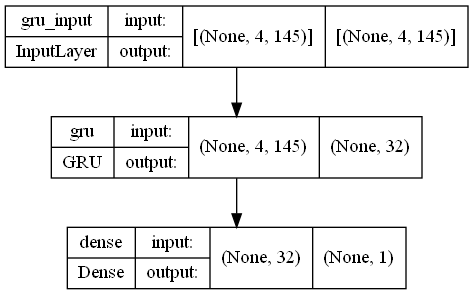

In [142]:
gru_model.summary()
plot_model(gru_model, show_shapes=True, show_layer_names=True, expand_nested=True)

confusion matrix for GRU

In [145]:
gru_predictions = gru_model.predict(xtest)
gru_predict = []
for i in gru_predictions:
    if i < 0.5 :
        m = 0
        gru_predict.append(m)
    else:
        m = 1
        gru_predict.append(m)

In [146]:
tn2, fp2, fn2, tp2 = confusion_matrix(ytest, gru_predict).ravel()
tn2, fp2, fn2, tp2

(8, 16, 3, 18)

Deep Lstm Model

In [186]:
keras.backend.clear_session()
inp = keras.Input(shape=(4,145),name='input_layer')
Lstm_hidden1 = keras.layers.LSTM(128, name='lstm_layer1',return_sequences=True)
Lstm_hidden2 = keras.layers.LSTM(80, name='lstm_layer2',return_sequences=True)
Lstm_hidden3 = keras.layers.LSTM(64, name='lstm_layer3',return_sequences=True)
Lstm_hidden4 = keras.layers.LSTM(32,name='lstm_layer4')
output_layer = keras.layers.Dense(1,name = 'output_layer')

lstm_hideen1_output = Lstm_hidden1(inp)
lstm_hideen2_output = Lstm_hidden2(lstm_hideen1_output)
lstm_hideen3_output = Lstm_hidden3(lstm_hideen2_output)
lstm_hideen4_output = Lstm_hidden4(lstm_hideen3_output)
output_value = output_layer(lstm_hideen4_output)

Deep_lstm_model = keras.Model(inputs= inp , outputs =output_value)
Deep_lstm_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4, 145)]          0         
                                                                 
 lstm_layer1 (LSTM)          (None, 4, 128)            140288    
                                                                 
 lstm_layer2 (LSTM)          (None, 4, 80)             66880     
                                                                 
 lstm_layer3 (LSTM)          (None, 4, 64)             37120     
                                                                 
 lstm_layer4 (LSTM)          (None, 32)                12416     
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 256,737
Trainable params: 256,737
Non-trainable

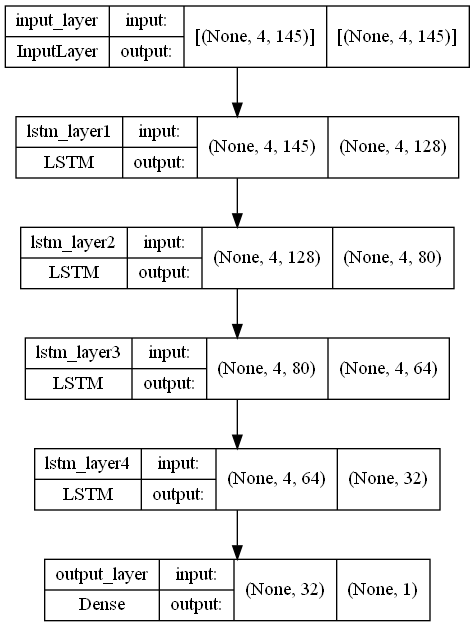

In [187]:
Deep_lstm_model.summary()
plot_model(Deep_lstm_model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [188]:
Deep_lstm_model.fit(xtrain ,ytrain,validation_data=(xval,yval) , epochs=200)
Deep_lstm_model.evaluate(xtest,ytest)

Epoch 1/200
5/5 [==============================] - 20s 996ms/step - loss: 3.4719 - accuracy: 0.4295 - val_loss: 2.5671 - val_accuracy: 0.3478
Epoch 2/200
5/5 [==============================] - 0s 43ms/step - loss: 2.0830 - accuracy: 0.4295 - val_loss: 2.2295 - val_accuracy: 0.3478
Epoch 3/200
5/5 [==============================] - 0s 49ms/step - loss: 1.8480 - accuracy: 0.4295 - val_loss: 2.0602 - val_accuracy: 0.3478
Epoch 4/200
5/5 [==============================] - 0s 51ms/step - loss: 1.7255 - accuracy: 0.4295 - val_loss: 1.9476 - val_accuracy: 0.3478
Epoch 5/200
5/5 [==============================] - 0s 56ms/step - loss: 1.6386 - accuracy: 0.4295 - val_loss: 1.8625 - val_accuracy: 0.3478
Epoch 6/200
5/5 [==============================] - 0s 52ms/step - loss: 1.5700 - accuracy: 0.4295 - val_loss: 1.7925 - val_accuracy: 0.3478
Epoch 7/200
5/5 [==============================] - 0s 45ms/step - loss: 1.5131 - accuracy: 0.4295 - val_loss: 1.7310 - val_accuracy: 0.3478
Epoch 8/200
5/5 [=

[0.7120218276977539, 0.5777778029441833]

Deep GRU Model

In [193]:
keras.backend.clear_session()
inp_gru = keras.Input(shape=(4,145),name='input_layer')
gru_hidden1 = keras.layers.GRU(128, name='gru_layer1',return_sequences=True)
gru_hidden2 = keras.layers.GRU(64,name='gru_layer2')
output_layer_gru = keras.layers.Dense(1,name = 'output_layer')

gru_hideen1_output = gru_hidden1(inp)
gru_hideen2_output = gru_hidden2(gru_hideen1_output)
output_value_gru = output_layer_gru(gru_hideen2_output)

Deep_gru_model = keras.Model(inputs= inp , outputs =output_value_gru)
Deep_gru_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4, 145)]          0         
                                                                 
 gru_layer1 (GRU)            (None, 4, 128)            105600    
                                                                 
 gru_layer2 (GRU)            (None, 64)                37248     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 142,913
Trainable params: 142,913
Non-trainable params: 0
_________________________________________________________________


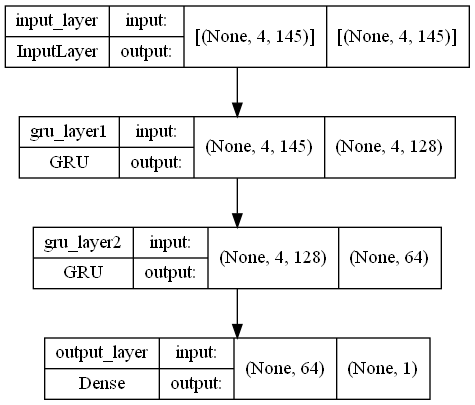

In [194]:
Deep_gru_model.summary()
plot_model(Deep_gru_model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [195]:
Deep_gru_model.fit(xtrain ,ytrain,validation_data=(xval,yval) , epochs=200)
Deep_gru_model.evaluate(xtest,ytest)

Epoch 1/200
5/5 [==============================] - 11s 411ms/step - loss: 0.8465 - accuracy: 0.4744 - val_loss: 0.7981 - val_accuracy: 0.4348
Epoch 2/200
5/5 [==============================] - 0s 33ms/step - loss: 0.8092 - accuracy: 0.4551 - val_loss: 0.8508 - val_accuracy: 0.3913
Epoch 3/200
5/5 [==============================] - 0s 33ms/step - loss: 0.7808 - accuracy: 0.5000 - val_loss: 0.8913 - val_accuracy: 0.3043
Epoch 4/200
5/5 [==============================] - 0s 30ms/step - loss: 0.7855 - accuracy: 0.4679 - val_loss: 0.8638 - val_accuracy: 0.3043
Epoch 5/200
5/5 [==============================] - 0s 32ms/step - loss: 0.7626 - accuracy: 0.4872 - val_loss: 0.8165 - val_accuracy: 0.3478
Epoch 6/200
5/5 [==============================] - 0s 32ms/step - loss: 0.7388 - accuracy: 0.5000 - val_loss: 0.7717 - val_accuracy: 0.3913
Epoch 7/200
5/5 [==============================] - 0s 30ms/step - loss: 0.7289 - accuracy: 0.5000 - val_loss: 0.7416 - val_accuracy: 0.4348
Epoch 8/200
5/5 [=

[0.706840455532074, 0.46666666865348816]

In [209]:
keras.backend.clear_session()
inp_gru = keras.Input(shape=(4,145),name='input_layer')
gru_hidden1 = keras.layers.GRU(128, name='gru_layer1',return_sequences=True)
gru_hidden2 = keras.layers.GRU(80, name='gru_layer2',return_sequences=True)
gru_hidden3 = keras.layers.GRU(64, name='gru_layer3',return_sequences=True)
gru_hidden4 = keras.layers.GRU(32,name='gru_layer4')
output_layer_gru = keras.layers.Dense(1,name = 'output_layer')

gru_hideen1_output = gru_hidden1(inp)
gru_hideen2_output = gru_hidden2(gru_hideen1_output)
gru_hideen3_output = gru_hidden3(gru_hideen2_output)
gru_hideen4_output = gru_hidden4(gru_hideen3_output)
output_value_gru = output_layer_gru(gru_hideen4_output)

Deep_gru_model = keras.Model(inputs= inp , outputs =output_value_gru)
Deep_gru_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4, 145)]          0         
                                                                 
 gru_layer1 (GRU)            (None, 4, 128)            105600    
                                                                 
 gru_layer2 (GRU)            (None, 4, 80)             50400     
                                                                 
 gru_layer3 (GRU)            (None, 4, 64)             28032     
                                                                 
 gru_layer4 (GRU)            (None, 32)                9408      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 193,473
Trainable params: 193,473
Non-trainable

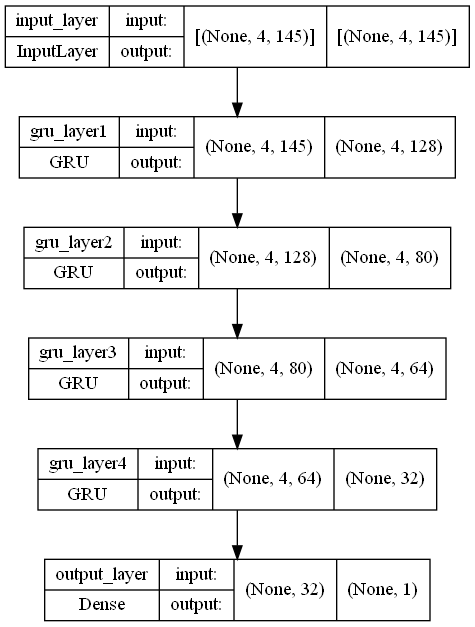

In [210]:
Deep_gru_model.summary()
plot_model(Deep_gru_model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [211]:
Deep_gru_model.fit(xtrain ,ytrain,validation_data=(xval,yval) , epochs=200)
Deep_gru_model.evaluate(xtest,ytest)

Epoch 1/200
5/5 [==============================] - 18s 737ms/step - loss: 1.2865 - accuracy: 0.4295 - val_loss: 1.1800 - val_accuracy: 0.3478
Epoch 2/200
5/5 [==============================] - 0s 47ms/step - loss: 0.9136 - accuracy: 0.4231 - val_loss: 0.9195 - val_accuracy: 0.3043
Epoch 3/200
5/5 [==============================] - 0s 43ms/step - loss: 0.7745 - accuracy: 0.4359 - val_loss: 0.8095 - val_accuracy: 0.4348
Epoch 4/200
5/5 [==============================] - 0s 46ms/step - loss: 0.7372 - accuracy: 0.4936 - val_loss: 0.7629 - val_accuracy: 0.3913
Epoch 5/200
5/5 [==============================] - 0s 46ms/step - loss: 0.7388 - accuracy: 0.5000 - val_loss: 0.7469 - val_accuracy: 0.4783
Epoch 6/200
5/5 [==============================] - 0s 45ms/step - loss: 0.7400 - accuracy: 0.4936 - val_loss: 0.7406 - val_accuracy: 0.5217
Epoch 7/200
5/5 [==============================] - 0s 47ms/step - loss: 0.7310 - accuracy: 0.5064 - val_loss: 0.7401 - val_accuracy: 0.4783
Epoch 8/200
5/5 [=

[1.3181369304656982, 0.5111111402511597]